## Visualizing results -  Original Geoparser - Seventh Edition

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within the **Seventh Edition of the Encyclopaedia Britannica**. 
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_7_edition nls defoe.nls.queries.geoparser_pages -r geoparser_original_EB_7_edition -n 16`



### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [5]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'])
        if place_name not in filter_list:
            print(i, place_count,place_name)
            if place_name not in place_label:
                k = k + 1
            place_label.append(place_name)
            place_freq.append(place_count)
         
        i = i + 1
    return place_label, place_freq

In [6]:
def plot_bar_places(df_group_places):
    # this is for plotting purpose
    index = np.arange(len(df_group_places['place_label']))
    plt.bar(index, df_group_places['count'], color='orange')
    plt.xlabel('Places')
    plt.ylabel('Frequency of Places')
    plt.xticks(index, df_group_places['place_label'], rotation=40, fontsize=8)
    plt.title('15 Places most mentioned in the using the Original Geoparser')

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages indicated in the query
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per book with an entry per page with the following information:

    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 


In [7]:
results=read_query_results('geoparser_original_EB_7_edition')

In [8]:
df_total= geresolution_dataframe(results)

In [9]:
df_total[["Place"]].count()

Place    339022
dtype: int64

In [10]:
df_total["Place"]= df_total["Place"].str.capitalize()

In [11]:
df_total.groupby("Place").count()

,Latitude,Longitude,Page
Place,,,
Aach,1,1,1
Aachen,7,7,7
Aalborg,7,7,7
Aalen,3,3,3
Aalsmeer,2,2,2
Aalten,3,3,3
Aam,3,3,3
Aamara,1,1,1
Aap,1,1,1


In [12]:
#df_total.groupby("Page").count()

In [13]:
#df_total.groupby(["Latitude", "Longitude"]).count()

In [14]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   

df_max_geolocations = df_filter.drop(0)

df_max_geolocations.head(15)


,Latitude,Longitude,count
12176,34.6120507,-82.765139,2619
26733,43.2256251,-75.48878740000001,2482
16945,38.7937266,-77.8577722,2026
36213,49.012779,2.55,1598
13859,36.2436749,-85.243301,1528
17133,38.8873341,-77.05553279999999,1526
18100,39.3081025,-86.4833294,1497
45694,54,-4,1488
13588,36.0300646,-85.3466385,1473
25036,42.4514848,-71.0864414,1381


In [15]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['Jupiter', 'Venus, a d p', 'Saturn']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 2619 France
1 2482 Rome
2 2026 England
3 1598 Paris
4 1528 France
5 1526 Scotland
6 1497 Hindustan
7 1488 Batua
8 1473 France
9 1381 England
10 1275 England
11 1238 Asia
12 1192 Europe
13 1177 Europe
14 1152 Italy
15 1131 Oxford
16 1105 Russia
17 1074 England
18 986 Paris
19 982 London
20 971 Edinburgh
21 962 Scotland
22 891 London
23 862 Britain


In [16]:
#Visualizing the 15 places in a Bar plot
df_places = {'place_label':place_label,'place_freq':place_freq}
df_places_freq = pd.DataFrame(df_places)
df_group_places = df_places_freq.groupby(['place_label'])['place_freq'].sum()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   


df_group_places

,place_label,count
4,England,5756
6,France,5620
11,Paris,2584
14,Scotland,2488
12,Rome,2482
5,Europe,2369
9,London,1873
7,Hindustan,1497
1,Batua,1488
0,Asia,1238


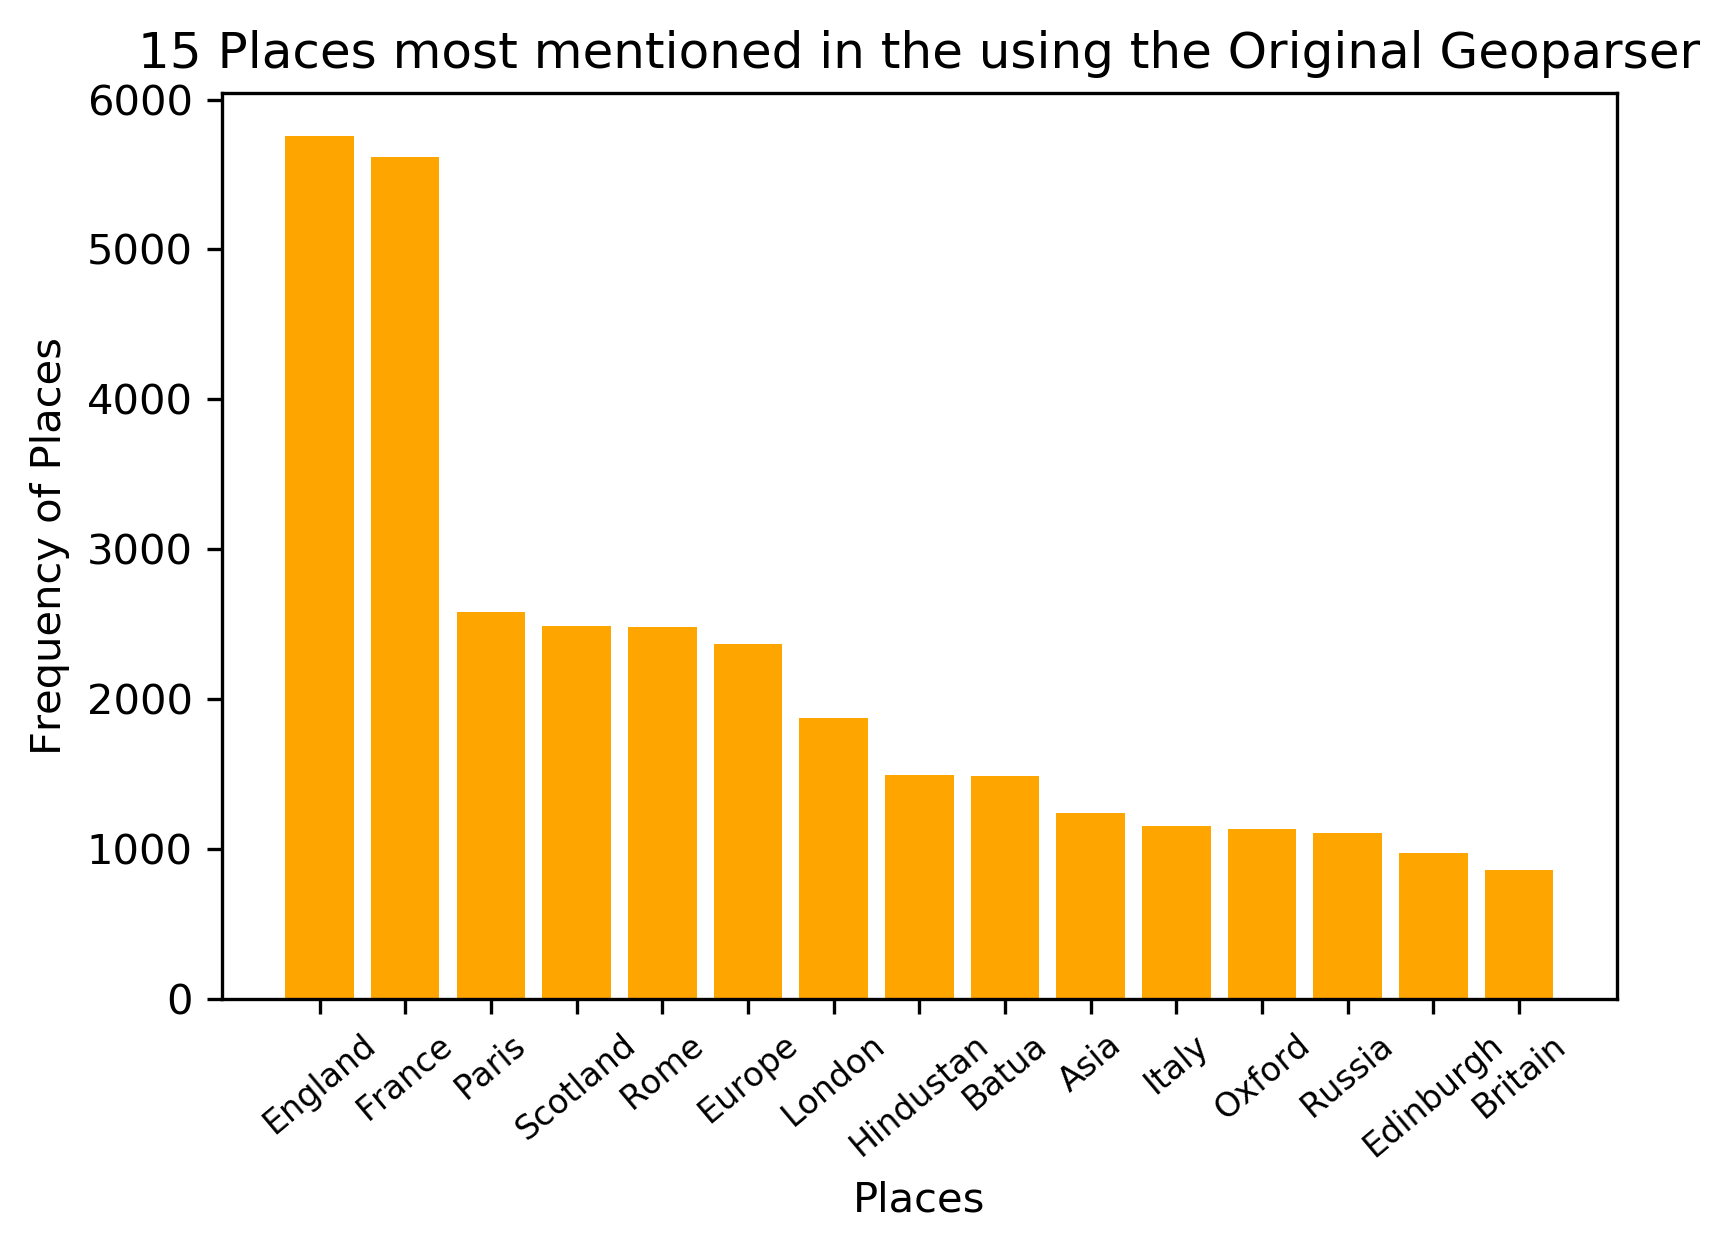

In [17]:
mpl.rcParams['figure.dpi']=300
plot_bar_places(df_group_places)